## Checking Version

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Oct_30_01:18:48_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.85
Build cuda_12.6.r12.6/compiler.35059454_0


## Installation

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip3 install torch torchvision torchaudio

In [3]:
!conda install numpy=1.26.4 -y




Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr



## Gray Scale Conversion

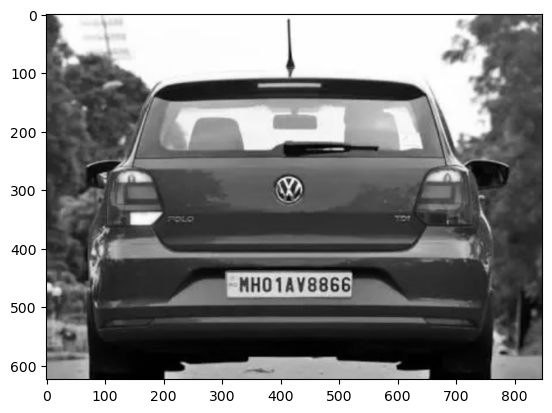

In [5]:
img=cv2.imread('C:/Users/ASUS/Desktop/sample_image4.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## Noise Reduction

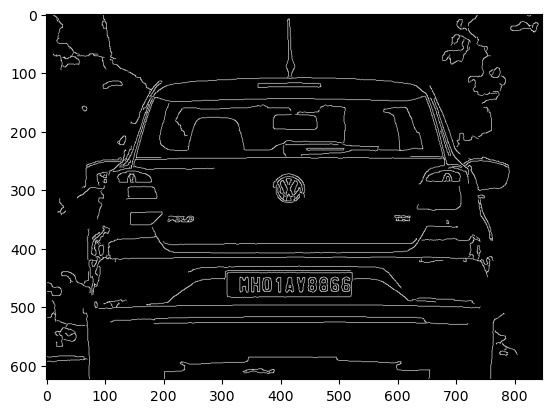

In [6]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #noise reduction
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Countours

In [7]:
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea,reverse=True)[:10]

## To find the location of the number plate by identifying a specific contour

In [8]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx) == 4:
    location = approx
    break
    

In [9]:
print(location)

[[[309 443]]

 [[310 483]]

 [[522 479]]

 [[521 441]]]


## Extracting the Number Plate Area

In [10]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)
     

## Display the extracted number plate area

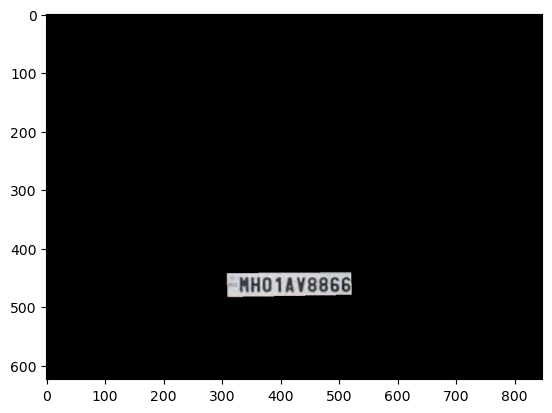

In [11]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

## Extracts the exact rectangular region of number plate

In [12]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped=gray[x1:x2+1, y1:y2+1]

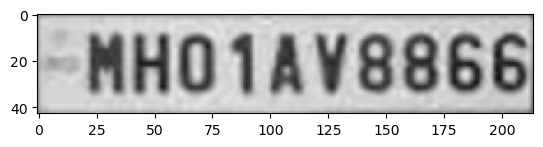

In [13]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

## Performing Optical Character Recognition (OCR) 

In [14]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped)
result
     

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[15, 1], [214, 1], [214, 41], [15, 41]], 'Mho1av8866', 0.28593208358559974)]

## Displaying the Recognized Number Plate with Text and Rectangle

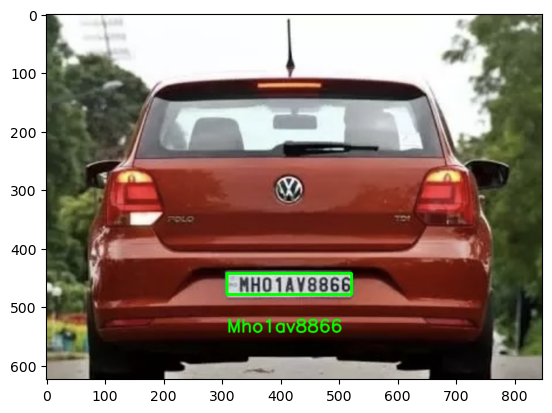

In [15]:
text=result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale=1, color =(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))